In [1]:
# Naver Sentiment Movie Corpus v1.0 다운로드
import tensorflow as tf

path_to_train_file = tf.keras.utils.get_file('train.txt', 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt')
path_to_test_file = tf.keras.utils.get_file('test.txt', 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt')

In [2]:
# 데이터 로드 및 확인
# 데이터를 메모리에 불러옵니다. 인코딩 형식으로 utf-8을 지정해야 합니다.
train_text = open(path_to_train_file, 'rb').read().decode(encoding='utf-8')
test_text = open(path_to_test_file, 'rb').read().decode(encoding='utf-8')

# 텍스트가 총 몇 자인지 확인합니다.
print('Length of text: {} characters'.format(len(train_text)))
print('Length of text: {} characters'.format(len(test_text)))
print()

# 처음 300자를 확인해봅니다.
print(train_text[:3000])

Length of text: 6937271 characters
Length of text: 2318260 characters

id	document	label
9976970	아 더빙.. 진짜 짜증나네요 목소리	0
3819312	흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나	1
10265843	너무재밓었다그래서보는것을추천한다	0
9045019	교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정	0
6483659	사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다	1
5403919	막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.	0
7797314	원작의 긴장감을 제대로 살려내지못했다.	0
9443947	별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단 낫겟다 납치.감금만반복반복..이드라마는 가족도없다 연기못하는사람만모엿네	0
7156791	액션이 없는데도 재미 있는 몇안되는 영화	1
5912145	왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?	1
9008700	걍인피니트가짱이다.진짜짱이다♥	1
10217543	볼때마다 눈물나서 죽겠다90년대의 향수자극!!허진호는 감성절제멜로의 달인이다~	1
5957425	울면서 손들고 횡단보도 건널때 뛰쳐나올뻔 이범수 연기 드럽게못해	0
8628627	담백하고 깔끔해서 좋다. 신문기사로만 보다 보면 자꾸 잊어버린다. 그들도 사람이었다는 것을.	1
9864035	취향은 존중한다지만 진짜 내생에 극장에서 본 영화중 가장 노잼 노감동임 스토리도 어거지고 감동도 어거지	0
6852435	ㄱ냥 매번 긴장되고 재밋음ㅠㅠ	1
9143163	참 사람들 웃긴게 바스코가 이기면 락스코라고 까고바비가 이기면 아이돌이라고 깐다.그냥 까고싶어서 안달난것처럼 보인다	1
4891476	굿바이 레닌 표절인것은 이해하는데 왜 뒤로 갈수록 재미없어지냐	0
7465483	이건 정말 깨알 

In [3]:
# 7.21 학습을 위한 예제 정답 마들기
import numpy as np

train_Y = np.array([[int(row.split('\t')[2])] for row in train_text.split('\n')[1:] if row.count('\t') > 0])
test_Y = np.array([[int(row.split('\t')[2])] for row in test_text.split('\n')[1:] if row.count('\t') > 0])

print(train_Y.shape, test_Y.shape)
print(train_Y[:5])

(150000, 1) (50000, 1)
[[0]
 [1]
 [0]
 [0]
 [1]]


In [4]:
# 7.22 훈련 데이터의 입력(X) 정제
import re
# From https://github.com/yoonkim/CNN_sentence/blob/master/process_data.py

def clean_str(string):
    string = re.sub(r"[^가-힣A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " \( ", string)
    string = re.sub(r"\)", " \) ", string)
    string = re.sub(r"\?", " \? ", string)
    string = re.sub(r"\s{2,}", " ", string)
    string = re.sub(r"\'{2,}", "\'", string)
    string = re.sub(r"\'", "", string)
    
    return string.lower()

train_text_X = [row.split('\t')[1] for row in train_text.split('\n')[1:] if row.count('\t') > 0]
train_text_X = [clean_str(sentence) for sentence in train_text_X]

# 문장을 띄어쓰기 단위로 단어 분리
sentences = [sentence.split(' ') for sentence in train_text_X]

for i in range(5):
    print(sentences[i])

['아', '더빙', '진짜', '짜증나네요', '목소리']
['흠', '포스터보고', '초딩영화줄', '오버연기조차', '가볍지', '않구나']
['너무재밓었다그래서보는것을추천한다']
['교도소', '이야기구먼', '솔직히', '재미는', '없다', '평점', '조정']
['사이몬페그의', '익살스런', '연기가', '돋보였던', '영화', '!', '스파이더맨에서', '늙어보이기만', '했던', '커스틴', '던스트가', '너무나도', '이뻐보였다']


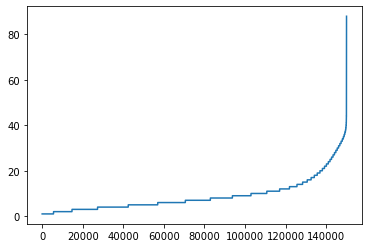

142587


In [5]:
# 각 문장의 단어 길이 확인
import matplotlib.pyplot as plt

sentence_len = [len(sentence) for sentence in sentences]
sentence_len.sort()
plt.plot(sentence_len)
plt.show()

print(sum([int(l <= 25) for l in sentence_len]))

In [6]:
# 7.24 단어 정제 및 문장 길이 줄임
sentences_new = []

for sentence in sentences:
    sentences_new.append([word[:5] for word in sentence][:25])

sentences = sentences_new

for i in range(5):
    print(sentences[i])

['아', '더빙', '진짜', '짜증나네요', '목소리']
['흠', '포스터보고', '초딩영화줄', '오버연기조', '가볍지', '않구나']
['너무재밓었']
['교도소', '이야기구먼', '솔직히', '재미는', '없다', '평점', '조정']
['사이몬페그', '익살스런', '연기가', '돋보였던', '영화', '!', '스파이더맨', '늙어보이기', '했던', '커스틴', '던스트가', '너무나도', '이뻐보였다']


In [7]:
# 7.25 Tokenizer와 pad_sequences를 이용한 문장 전처리
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(sentences)
train_X = tokenizer.texts_to_sequences(sentences)
train_X = pad_sequences(train_X, padding='post')

print(train_X[:5])

[[   25   884     8  5795  1111     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [  588  5796  6697     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [   71   346    31    35 10468     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [  106  5338     4     2  2169   869   573     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]]


In [22]:
# 7.26 Tokenizer의 동작 확인
print(tokenizer.index_word[19999])
print(tokenizer.index_word[20000])

temp = tokenizer.texts_to_sequences(['#$#$#', '경우는', '잊혀질', '연기가'])
print(temp)

temp=pad_sequences(temp, padding='post')
print(temp)

경우는
잊혀질
[[], [19999], [], [106]]
[[    0]
 [19999]
 [    0]
 [  106]]


In [8]:
# 7.27 감성 분석을 위한 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(20000, 300, input_length=25),
    tf.keras.layers.LSTM(units=50),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 300)           6000000   
_________________________________________________________________
lstm (LSTM)                  (None, 50)                70200     
_________________________________________________________________
dense (Dense)                (None, 2)                 102       
Total params: 6,070,302
Trainable params: 6,070,302
Non-trainable params: 0
_________________________________________________________________


In [9]:
# 7.28 감성 분석 모델 학습
history = model.fit(train_X, train_Y, epochs=5, batch_size=128, validation_split=0.2)

Train on 120000 samples, validate on 30000 samples
Epoch 1/5
120000/120000 [==============================] - 62s 517us/sample - loss: 0.4337 - accuracy: 0.7832 - val_loss: 0.3798 - val_accuracy: 0.8225
Epoch 2/5
120000/120000 [==============================] - 58s 487us/sample - loss: 0.3246 - accuracy: 0.8472 - val_loss: 0.3810 - val_accuracy: 0.8220
Epoch 3/5
120000/120000 [==============================] - 58s 487us/sample - loss: 0.2750 - accuracy: 0.8665 - val_loss: 0.4124 - val_accuracy: 0.8140
Epoch 4/5
120000/120000 [==============================] - 58s 487us/sample - loss: 0.2339 - accuracy: 0.8837 - val_loss: 0.4838 - val_accuracy: 0.8110
Epoch 5/5
120000/120000 [==============================] - 58s 487us/sample - loss: 0.2007 - accuracy: 0.8996 - val_loss: 0.5433 - val_accuracy: 0.8102


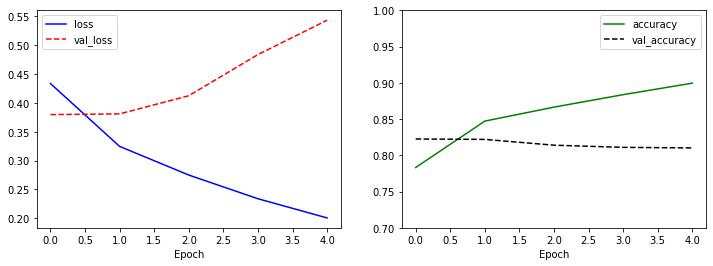

In [10]:
# 7.29 감성 분석 모델의 학습 결과 확인
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [11]:
# 7.30 테스트 데이터 평가
test_text_X = [row.split('\t')[1] for row in test_text.split('\n')[1:] if row.count('\t') > 0]
test_text_X = [clean_str(sentence) for sentence in test_text_X]
sentences = [sentence.split(' ') for sentence in test_text_X]
sentences_new = []

for sentence in sentences:
    sentences_new.append([word[:5] for word in sentence][:25])
    
sentences = sentences_new
test_X = tokenizer.texts_to_sequences(sentences)
test_X = pad_sequences(test_X, padding='post')

model.evaluate(test_X, test_Y, verbose=0)

[0.5479501787090302, 0.8023]

In [14]:
# 7.31 임의의 문장에 대한 감성 분석 결과 확인
test_sentence = '처음에는 졸리고 돈도 아까웠는데, 후반부가 포텐이 터지면서 매우 재밌었다.'
test_sentence = test_sentence.split(' ')
test_sentences = []
now_sentence = []

for word in test_sentence:
    now_sentence.append(word)
    test_sentences.append(now_sentence[:])
    
test_X_1 = tokenizer.texts_to_sequences(test_sentences)
test_X_1 = pad_sequences(test_X_1, padding='post', maxlen=25)
prediction = model.predict(test_X_1)

for idx, sentence in enumerate(test_sentences):
    print(sentence)
    print(prediction[idx])

['처음에는']
[0.36694983 0.63305014]
['처음에는', '졸리고']
[0.9622636  0.03773637]
['처음에는', '졸리고', '돈도']
[0.99740523 0.00259475]
['처음에는', '졸리고', '돈도', '아까웠는데,']
[0.99740523 0.00259475]
['처음에는', '졸리고', '돈도', '아까웠는데,', '후반부가']
[0.9974728  0.00252719]
['처음에는', '졸리고', '돈도', '아까웠는데,', '후반부가', '포텐이']
[0.9974728  0.00252719]
['처음에는', '졸리고', '돈도', '아까웠는데,', '후반부가', '포텐이', '터지면서']
[0.9974728  0.00252719]
['처음에는', '졸리고', '돈도', '아까웠는데,', '후반부가', '포텐이', '터지면서', '매우']
[0.9962198  0.00378024]
['처음에는', '졸리고', '돈도', '아까웠는데,', '후반부가', '포텐이', '터지면서', '매우', '재밌었다.']
[0.9962198  0.00378024]
